In [0]:
import tensorflow as tf
import json
import numpy as np

In [0]:
with open("Sarcasm_Headlines_Dataset.json") as f:
  datastore = f.read()

In [4]:
sentences = []
urls=[]
labels=[]
datastore=datastore.split('\n')
for data in datastore:
  temp = json.loads(data)
  sentences.append(temp['headline'])
  urls.append(temp['article_link'])
  labels.append(temp['is_sarcastic'])

JSONDecodeError: ignored

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
vocab_size=10000
embedding_dim = 16
max_length=120
oov_tok = "<OOV>"
trunc_type="post"
padding_type = 'post'
training_size = 20000

In [0]:
training_sentences = sentences[:training_size]
training_labels = labels[:training_size]
testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

In [0]:
tokenizer = Tokenizer(num_words = vocab_size,oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)

In [0]:
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dropout(0.45),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dropout(0.35),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                400       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

In [12]:
num_epochs = 30
history = model.fit(training_padded,training_labels_final,epochs=num_epochs,validation_data = (testing_padded,testing_labels_final),verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 2s - loss: 0.6823 - accuracy: 0.5602 - val_loss: 0.6603 - val_accuracy: 0.5633
Epoch 2/30
20000/20000 - 2s - loss: 0.5395 - accuracy: 0.7390 - val_loss: 0.4642 - val_accuracy: 0.8135
Epoch 3/30
20000/20000 - 2s - loss: 0.4159 - accuracy: 0.8615 - val_loss: 0.4110 - val_accuracy: 0.8442
Epoch 4/30
20000/20000 - 2s - loss: 0.3438 - accuracy: 0.8842 - val_loss: 0.4560 - val_accuracy: 0.8264
Epoch 5/30
20000/20000 - 2s - loss: 0.2963 - accuracy: 0.9018 - val_loss: 0.4221 - val_accuracy: 0.8459
Epoch 6/30
20000/20000 - 2s - loss: 0.2575 - accuracy: 0.9164 - val_loss: 0.4273 - val_accuracy: 0.8444
Epoch 7/30
20000/20000 - 2s - loss: 0.2286 - accuracy: 0.9261 - val_loss: 0.4506 - val_accuracy: 0.8283
Epoch 8/30
20000/20000 - 2s - loss: 0.2124 - accuracy: 0.9315 - val_loss: 0.5047 - val_accuracy: 0.8438
Epoch 9/30
20000/20000 - 2s - loss: 0.1923 - accuracy: 0.9390 - val_loss: 0.6590 - val_accuracy: 0.8331
Epoch 10/30
200

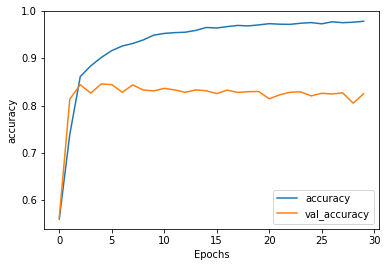

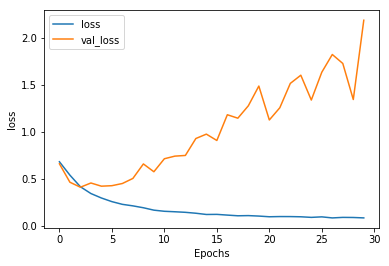

In [16]:
import matplotlib.pyplot as plt
def plot_graph(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()
  
plot_graph(history,'accuracy')
plot_graph(history,'loss')

In [0]:
print(tf.__version__)

{'accuracy': [0.56025,
  0.739,
  0.86155,
  0.88415,
  0.90185,
  0.91635,
  0.9261,
  0.93145,
  0.93895,
  0.9491,
  0.95275,
  0.9544,
  0.9553,
  0.95905,
  0.9653,
  0.9642,
  0.96715,
  0.96965,
  0.9686,
  0.97075,
  0.97335,
  0.97225,
  0.97195,
  0.97425,
  0.97565,
  0.97305,
  0.97735,
  0.97545,
  0.9764,
  0.9785],
 'loss': [0.6822946558952332,
  0.53946876745224,
  0.41586095900535586,
  0.34375927171707155,
  0.29626736097335815,
  0.2575280608654022,
  0.2286004462838173,
  0.21242998178601266,
  0.19234060341715814,
  0.16676001828312872,
  0.15474046356081964,
  0.14961854503154753,
  0.14370496816933154,
  0.1339364705890417,
  0.12071613608002663,
  0.12181058850586414,
  0.11409542077481746,
  0.10681660788357258,
  0.10872285594940186,
  0.10372618427425623,
  0.0963610821440816,
  0.09853345412015915,
  0.0982596321567893,
  0.09610810123831033,
  0.08985119165033102,
  0.09534390311837196,
  0.08407581506222486,
  0.08970232297182083,
  0.0886421047270298,
  0